<a href="https://colab.research.google.com/github/LaurenOKane/Learning-Python/blob/main/M9T1_Data_Preparation_for_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

~

<h3><font color="#AA00BB">How you can use this Notebook</font></h3>
<p>This notebook was written to teach new concepts in data using Python.</p>
<p>You can read through the descriptions run the code (it should work!), or you may be taken through the code by one of our experts.</p>
<p>But one of the best habits to acquire is to re-write the code yourself.</p>
<ul><li>Experiment
<li>Break the code
<li>Build a deeper understanding of both the underlying data concepts and the code</ul>
<p>Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.</p>
<p>Enjoy!</p>
<p> - <i><font color="#AA00BB">Data Assembly team.</font></i></p>
<br>

> ❓🤔 = a question for us discuss

> ⌨️ = a task for you to try

> 🔑 = an authoritative reference or guide you may find useful

> 🚀 = **optional** material to develop yourself further



<a name="contents"></a>
## Contents

<br>1. [Handling Missing Data](#section_1)
<br>2. [Handling Outliers](#section_2)
<br>3. [Scaling Data](#section_3)
<br>4. [Feature Engineering and One-hot Encoding](#section_4)


<h2><font color="#AA00BB">Welcome to our workbook on Data Prepartion for Machine Learning!</font></h2>

Machine learning is a fascinating field that enables computers to learn and improve from data without being explicitly programmed. It transforms various industries by enabling predictive modelling, pattern recognition, and complex data analysis.

At their core, machine learning models learn from data to make predictions or decisions. The quality and reliability of these models depend heavily on adequately preparing the input data.

The first crucial step in any machine learning project is data preparation.

Let's get started!

<a name="section_1"></a>

# **1. Handling Missing Data**


[Return to contents](#contents)

In this tutorial, we will be working with a dataset from a customer satisfaction survey conducted by a retail store. The dataset includes various features such as age, annual income, purchase history, and satisfaction ratings from 1,000 customers.

A notable challenge in this dataset is the presence of missing data, particularly in the '**Age**' and '**LastPurchaseAmount**' fields. Missing data can significantly impact the quality of our analysis and models.

To address this, we will explore techniques like deletion, imputation, and flagging, which are essential for preparing the dataset for robust data analysis and modeling.

#### **1.1 Let's download and quickly explore our dataset**

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/BPP-Digital-Advanced-Data-Analytics/public_datasets/main/customer_satisfaction_survey.csv')
df

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear
0,1,62.0,46768.706676,30,1,106.411107,9,Clothing,3
1,2,65.0,57211.417147,25,10,120.774766,4,Clothing,5
2,3,18.0,75577.800795,17,7,386.345119,6,Electronics,3
3,4,21.0,31396.118017,17,6,188.322265,6,Clothing,1
4,5,21.0,47542.791123,15,7,275.150744,5,Groceries,3
...,...,...,...,...,...,...,...,...,...
995,996,54.0,22283.542413,13,3,134.657002,9,Clothing,2
996,997,19.0,73138.884100,21,2,40.269493,9,Electronics,5
997,998,47.0,25448.101592,27,4,243.671050,7,Clothing,3
998,999,23.0,56828.443807,14,8,368.247212,1,Electronics,2


In [2]:
# Let's explore our dataset's descriptive statistics
df.describe()

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,ReturnedItemsLastYear
count,1000.000000,900.000000,1000.000000,1000.000000,1000.000000,950.000000,1000.000000,1000.00000
mean,500.500000,43.125556,54675.431558,20.012000,5.478000,206.756634,5.101000,3.27400
std,288.819436,15.170694,26351.833327,4.427579,2.880245,225.638106,2.609906,2.90368
min,1.000000,18.000000,988.660890,7.000000,1.000000,0.098217,1.000000,0.00000
25%,250.750000,30.000000,40186.026701,17.000000,3.000000,56.292874,3.000000,2.00000
50%,500.500000,43.000000,51002.946522,20.000000,5.000000,139.494026,5.000000,3.00000
75%,750.250000,56.000000,61821.447798,23.000000,8.000000,285.989112,7.000000,4.00000
max,1000.000000,69.000000,213927.381697,36.000000,10.000000,2461.653672,9.000000,35.00000


#### **1.2 Now lets check to see if there are any missing values**

In [3]:
df.isnull().sum()

CustomerID                    0
Age                         100
AnnualIncome                  0
TotalPurchases                0
SatisfactionRating            0
LastPurchaseAmount           50
MembershipDuration            0
PreferredProductCategory      0
ReturnedItemsLastYear         0
dtype: int64

Here we see that the **Age** column and the **LastPurchaseAmount** have 100 and 50 missing

In [4]:
# Let's view the first 20 rows so we can see the missing values in LastPurchaseAmount
df.head(20)

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear
0,1,62.0,46768.706676,30,1,106.411107,9,Clothing,3
1,2,65.0,57211.417147,25,10,120.774766,4,Clothing,5
2,3,18.0,75577.800795,17,7,386.345119,6,Electronics,3
3,4,21.0,31396.118017,17,6,188.322265,6,Clothing,1
4,5,21.0,47542.791123,15,7,275.150744,5,Groceries,3
5,6,57.0,64243.413913,17,10,253.276165,4,Clothing,4
6,7,NaN,52294.609505,17,7,31.319222,9,Groceries,3
7,8,37.0,60671.021426,12,6,751.857173,9,Clothing,5
8,9,39.0,79287.898445,24,9,244.976766,1,Clothing,1
9,10,68.0,28466.584570,29,2,173.559763,5,Clothing,3


### **Dealing with Missing Data**

After identifying missing data we can handle them the following ways:
1. **Imputation** - Filling in the missing data with mean, meadian, specific values, foward or back fills.
2. **Flagging** - create a new feature that states a value is missing e.g. a column called AgeMissing.
3. **Deleting** - simply deleting the missing rows (acceptable when datasets are large and missing data is low and random)

#### **1.3 Imputation**

In the code below, we get the mean value for LastPurchaseAmount and then using pandas' fillna funciton, we replace all missing values with the mean.

In [5]:
# Impute missing 'LastPurchaseAmount' with the mean or median
mean_value = df['LastPurchaseAmount'].mean()
df['LastPurchaseAmount'].fillna(mean_value, inplace=False).head(20)

0     106.411107
1     120.774766
2     386.345119
3     188.322265
4     275.150744
5     253.276165
6      31.319222
7     751.857173
8     244.976766
9     173.559763
10      9.245771
11    500.405330
12    126.808485
13    484.256568
14    206.756634
15    172.220880
16    206.756634
17    123.545218
18     39.575928
19    110.699627
Name: LastPurchaseAmount, dtype: float64

In [6]:
# Fill missing values with a constant, e.g., 0
df_filled = df.fillna(0)
df_filled.head(20)

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear
0,1,62.0,46768.706676,30,1,106.411107,9,Clothing,3
1,2,65.0,57211.417147,25,10,120.774766,4,Clothing,5
2,3,18.0,75577.800795,17,7,386.345119,6,Electronics,3
3,4,21.0,31396.118017,17,6,188.322265,6,Clothing,1
4,5,21.0,47542.791123,15,7,275.150744,5,Groceries,3
5,6,57.0,64243.413913,17,10,253.276165,4,Clothing,4
6,7,0.0,52294.609505,17,7,31.319222,9,Groceries,3
7,8,37.0,60671.021426,12,6,751.857173,9,Clothing,5
8,9,39.0,79287.898445,24,9,244.976766,1,Clothing,1
9,10,68.0,28466.584570,29,2,173.559763,5,Clothing,3


In [7]:
# Use Pandas fillna to fill missing values with the mean of the column
# Or, for the median
df_filled = df.fillna(df.median())
df_filled.head(20)

<ipython-input-7-df0988e97941>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.median())


,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear
0,1,62.0,46768.706676,30,1,106.411107,9,Clothing,3
1,2,65.0,57211.417147,25,10,120.774766,4,Clothing,5
2,3,18.0,75577.800795,17,7,386.345119,6,Electronics,3
3,4,21.0,31396.118017,17,6,188.322265,6,Clothing,1
4,5,21.0,47542.791123,15,7,275.150744,5,Groceries,3
5,6,57.0,64243.413913,17,10,253.276165,4,Clothing,4
6,7,43.0,52294.609505,17,7,31.319222,9,Groceries,3
7,8,37.0,60671.021426,12,6,751.857173,9,Clothing,5
8,9,39.0,79287.898445,24,9,244.976766,1,Clothing,1
9,10,68.0,28466.584570,29,2,173.559763,5,Clothing,3


In [8]:
# Forward fill
df_ffill = df.fillna(method='ffill')
df_ffill.head(20)

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear
0,1,62.0,46768.706676,30,1,106.411107,9,Clothing,3
1,2,65.0,57211.417147,25,10,120.774766,4,Clothing,5
2,3,18.0,75577.800795,17,7,386.345119,6,Electronics,3
3,4,21.0,31396.118017,17,6,188.322265,6,Clothing,1
4,5,21.0,47542.791123,15,7,275.150744,5,Groceries,3
5,6,57.0,64243.413913,17,10,253.276165,4,Clothing,4
6,7,57.0,52294.609505,17,7,31.319222,9,Groceries,3
7,8,37.0,60671.021426,12,6,751.857173,9,Clothing,5
8,9,39.0,79287.898445,24,9,244.976766,1,Clothing,1
9,10,68.0,28466.584570,29,2,173.559763,5,Clothing,3


In [9]:
# Backward fill
df_bfill = df.fillna(method='bfill')
df_ffill.head(20)

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear
0,1,62.0,46768.706676,30,1,106.411107,9,Clothing,3
1,2,65.0,57211.417147,25,10,120.774766,4,Clothing,5
2,3,18.0,75577.800795,17,7,386.345119,6,Electronics,3
3,4,21.0,31396.118017,17,6,188.322265,6,Clothing,1
4,5,21.0,47542.791123,15,7,275.150744,5,Groceries,3
5,6,57.0,64243.413913,17,10,253.276165,4,Clothing,4
6,7,57.0,52294.609505,17,7,31.319222,9,Groceries,3
7,8,37.0,60671.021426,12,6,751.857173,9,Clothing,5
8,9,39.0,79287.898445,24,9,244.976766,1,Clothing,1
9,10,68.0,28466.584570,29,2,173.559763,5,Clothing,3


#### **1.4 Flagging Missing Value**

In [10]:
# Create a new binary feature indicating missing values in 'Age'
df['AgeMissing'] = df['Age'].isnull().astype(int)
df['LastPurchaseAmountMissing'] = df['LastPurchaseAmount'].isnull().astype(int)
df.head(20)

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear,AgeMissing,LastPurchaseAmountMissing
0,1,62.0,46768.706676,30,1,106.411107,9,Clothing,3,0,0
1,2,65.0,57211.417147,25,10,120.774766,4,Clothing,5,0,0
2,3,18.0,75577.800795,17,7,386.345119,6,Electronics,3,0,0
3,4,21.0,31396.118017,17,6,188.322265,6,Clothing,1,0,0
4,5,21.0,47542.791123,15,7,275.150744,5,Groceries,3,0,0
5,6,57.0,64243.413913,17,10,253.276165,4,Clothing,4,0,0
6,7,NaN,52294.609505,17,7,31.319222,9,Groceries,3,1,0
7,8,37.0,60671.021426,12,6,751.857173,9,Clothing,5,0,0
8,9,39.0,79287.898445,24,9,244.976766,1,Clothing,1,0,0
9,10,68.0,28466.584570,29,2,173.559763,5,Clothing,3,0,0


### **1.5 Deleting Missing values**

In [11]:
# Remove records where 'Age' is missing
df_cleaned = df.dropna(subset=['Age'])
df_cleaned.head(10)

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear,AgeMissing,LastPurchaseAmountMissing
0,1,62.0,46768.706676,30,1,106.411107,9,Clothing,3,0,0
1,2,65.0,57211.417147,25,10,120.774766,4,Clothing,5,0,0
2,3,18.0,75577.800795,17,7,386.345119,6,Electronics,3,0,0
3,4,21.0,31396.118017,17,6,188.322265,6,Clothing,1,0,0
4,5,21.0,47542.791123,15,7,275.150744,5,Groceries,3,0,0
5,6,57.0,64243.413913,17,10,253.276165,4,Clothing,4,0,0
7,8,37.0,60671.021426,12,6,751.857173,9,Clothing,5,0,0
8,9,39.0,79287.898445,24,9,244.976766,1,Clothing,1,0,0
9,10,68.0,28466.584570,29,2,173.559763,5,Clothing,3,0,0
10,11,54.0,70268.093100,16,8,9.245771,3,Groceries,1,0,0


##⌨️ **Exercise**

1. **Simple**: How many records have missing 'Age' values in the dataset? (Code required)
2. **Moderate**: Write a Python function to impute missing values in the 'LastPurchaseAmount' column with the median of the column. (Code required)
3. **Challenging (Optional🚀)**: After flagging missing values in 'Age', calculate the percentage of customers with missing 'Age' data. (Code required)

<a name="section_2"></a>

# **2. Outlier Detection**


[Return to contents](#contents)

First, ensure you have Pandas and SciPy libraries installed. Import them in your Python environment:

In [12]:
import pandas as pd
import numpy as np
from scipy import stats

df.head()

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear,AgeMissing,LastPurchaseAmountMissing
0,1,62.0,46768.706676,30,1,106.411107,9,Clothing,3,0,0
1,2,65.0,57211.417147,25,10,120.774766,4,Clothing,5,0,0
2,3,18.0,75577.800795,17,7,386.345119,6,Electronics,3,0,0
3,4,21.0,31396.118017,17,6,188.322265,6,Clothing,1,0,0
4,5,21.0,47542.791123,15,7,275.150744,5,Groceries,3,0,0


In [13]:
df['AnnualIncome'].describe()

count      1000.000000
mean      54675.431558
std       26351.833327
min         988.660890
25%       40186.026701
50%       51002.946522
75%       61821.447798
max      213927.381697
Name: AnnualIncome, dtype: float64

#### **2.1 Identify Outliers using the IQR Method**

The table output below shows all the values that could be considered outliers in our dataset if using the IQR method.

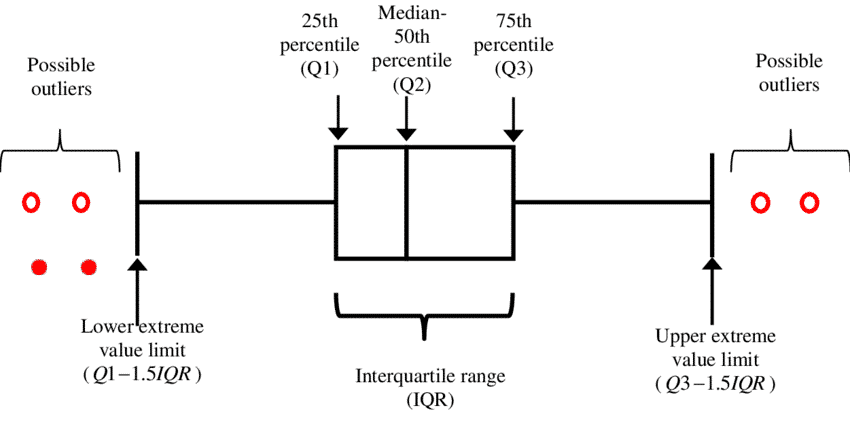

Assuming df is your DataFrame loaded with the customer satisfaction survey data.

- **IQR**: Identify Outliers in 'AnnualIncome'

The IQR is a measure of statistical dispersion and is used to detect outliers.

In [14]:
# Calculate Q1, Q3, and IQR
Q1 = df['AnnualIncome'].quantile(0.25)
Q3 = df['AnnualIncome'].quantile(0.75)
IQR = Q3 - Q1
print(f'ICQ is = {IQR}')

ICQ is = 21635.421096435886


In [15]:
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'lower_bound is = {lower_bound}')
print(f'upper_bound is = {upper_bound}')

lower_bound is = 7732.895056759979
upper_bound is = 94274.57944250353


In [16]:
# Identify outliers
outliers_iqr = df[(df['AnnualIncome'] < lower_bound) | (df['AnnualIncome'] > upper_bound)]
outliers_iqr

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear,AgeMissing,LastPurchaseAmountMissing
45,46,NaN,988.660890,28,2,652.111386,9,Clothing,1,1,0
58,59,18.0,95754.292512,21,1,37.424103,5,Groceries,1,0,0
82,83,53.0,136532.743983,16,10,75.597009,5,Groceries,3,0,0
98,99,53.0,165181.239256,19,2,104.994139,7,Electronics,6,0,0
104,105,67.0,135758.188411,17,6,178.401192,9,Clothing,2,0,0
134,135,53.0,188561.726250,22,9,22.127727,5,Electronics,4,0,0
153,154,20.0,210728.883979,21,4,146.380743,3,Clothing,1,0,0
154,155,69.0,100182.042356,16,10,73.421010,4,Groceries,1,0,0
158,159,56.0,183961.230049,36,6,11.953283,8,Clothing,6,0,0
185,186,22.0,168746.396298,19,2,139.440891,9,Electronics,3,0,0


### **2.2 Z-score: Detect Outliers**

Z-score indicates how many standard deviations an element is from the mean.

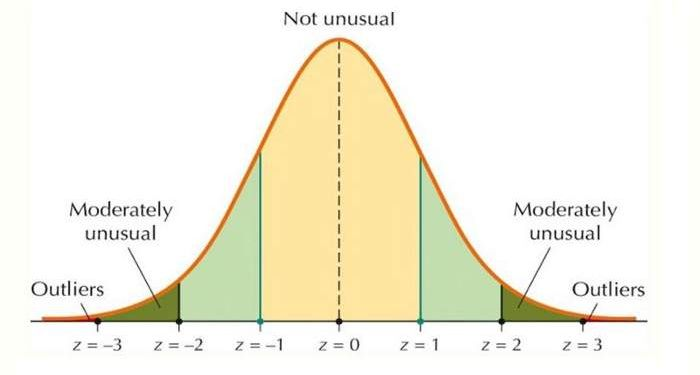

This code calculates the absolute value of the Z-score for each data point in LastPurchaseAmount. By comparing these absolute Z-scores against the threshold (3 in this case), it effectively identifies outliers that are more than 3 standard deviations away from the mean in either direction.

In [17]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df['AnnualIncome'].dropna()))

# Set a threshold, e.g., 3 for identifying outliers
threshold = 3
outliers_z = df[z_scores > threshold]
outliers_z

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear,AgeMissing,LastPurchaseAmountMissing
82,83,53.0,136532.743983,16,10,75.597009,5,Groceries,3,0,0
98,99,53.0,165181.239256,19,2,104.994139,7,Electronics,6,0,0
104,105,67.0,135758.188411,17,6,178.401192,9,Clothing,2,0,0
134,135,53.0,188561.726250,22,9,22.127727,5,Electronics,4,0,0
153,154,20.0,210728.883979,21,4,146.380743,3,Clothing,1,0,0
158,159,56.0,183961.230049,36,6,11.953283,8,Clothing,6,0,0
185,186,22.0,168746.396298,19,2,139.440891,9,Electronics,3,0,0
219,220,47.0,175600.414217,24,1,509.586005,4,Clothing,3,0,0
300,301,43.0,204873.276770,18,6,307.550183,9,Clothing,5,0,0
303,304,53.0,147211.961346,25,10,189.203264,8,Clothing,3,0,0


### **2.3 Log Transformation: Reduce Skewness in 'TotalPurchases'**
Log transformation can help in reducing the skewness of a distribution.

python


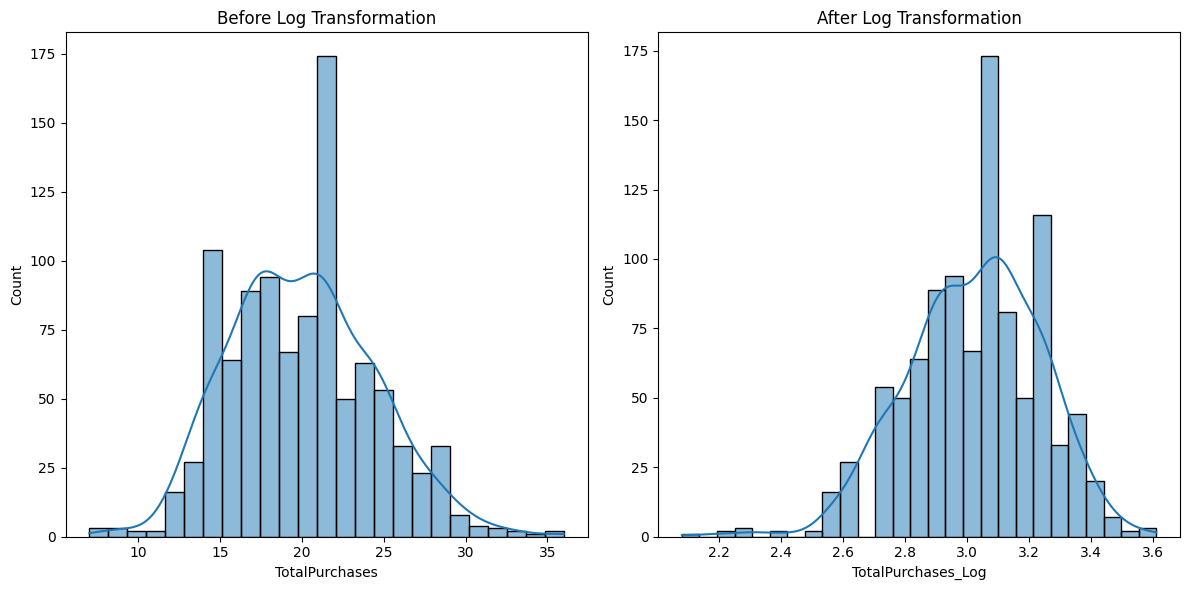

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation
df['TotalPurchases_Log'] = np.log(df['TotalPurchases'] + 1)  # Add 1 to avoid log(0)

# Plotting
plt.figure(figsize=(12, 6))

# Plot before log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['TotalPurchases'], kde=True)
plt.title('Before Log Transformation')
plt.xlabel('TotalPurchases')

# Plot after log transformation
plt.subplot(1, 2, 2)
sns.histplot(df['TotalPurchases_Log'], kde=True)
plt.title('After Log Transformation')
plt.xlabel('TotalPurchases_Log')

plt.tight_layout()
plt.show()

### **2.4  Capping: Cap Outliers in 'ReturnedItemsLastYear'**

Capping is used to limit the range of values in a dataset.

In the code below any ReturnedItemsLastYear's over 6 would be capped at 6.

In [19]:
# Define the upper limit for capping
upper_limit = df['ReturnedItemsLastYear'].quantile(0.95)

print(f'upper_limit is = {upper_limit}')

# Cap values
df['ReturnedItemsLastYear_Capped'] = df['ReturnedItemsLastYear'].clip(upper=upper_limit)
df

upper_limit is = 6.0


,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear,AgeMissing,LastPurchaseAmountMissing,TotalPurchases_Log,ReturnedItemsLastYear_Capped
0,1,62.0,46768.706676,30,1,106.411107,9,Clothing,3,0,0,3.433987,3
1,2,65.0,57211.417147,25,10,120.774766,4,Clothing,5,0,0,3.258097,5
2,3,18.0,75577.800795,17,7,386.345119,6,Electronics,3,0,0,2.890372,3
3,4,21.0,31396.118017,17,6,188.322265,6,Clothing,1,0,0,2.890372,1
4,5,21.0,47542.791123,15,7,275.150744,5,Groceries,3,0,0,2.772589,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54.0,22283.542413,13,3,134.657002,9,Clothing,2,0,0,2.639057,2
996,997,19.0,73138.884100,21,2,40.269493,9,Electronics,5,0,0,3.091042,5
997,998,47.0,25448.101592,27,4,243.671050,7,Clothing,3,0,0,3.332205,3
998,999,23.0,56828.443807,14,8,368.247212,1,Electronics,2,0,0,2.708050,2


### **2.5 Removing Outliers**

As we can see we've used various methods to identify outliers. We now need to delete them from our dataset as we take our analysis and modeling further.

We can do that with a single line of code in pandas.



```
df_no_outliers = df[~((df['AnnualIncome'] < lower_bound) | (df['AnnualIncome'] > upper_bound))]
```



**Conditional Selection:**
- The condition (df['AnnualIncome'] < lower_bound) | (df['AnnualIncome'] > upper_bound) creates a boolean series that is True for each row where the 'AnnualIncome' is either below the lower bound or above the upper bound, i.e., it identifies the outliers.

**Inverting the Condition:**
- The ~ operator inverts the boolean series, so it becomes True for all rows that are NOT outliers.

**Filtering the DataFrame:**
- By using this inverted condition to index df, df_no_outliers is created containing only the rows where the 'AnnualIncome' values are within the acceptable range (not outliers).

In [20]:
# Remove outliers based on IQR
df_no_outliers = df[~((df['AnnualIncome'] < lower_bound) | (df['AnnualIncome'] > upper_bound))]
df_no_outliers

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear,AgeMissing,LastPurchaseAmountMissing,TotalPurchases_Log,ReturnedItemsLastYear_Capped
0,1,62.0,46768.706676,30,1,106.411107,9,Clothing,3,0,0,3.433987,3
1,2,65.0,57211.417147,25,10,120.774766,4,Clothing,5,0,0,3.258097,5
2,3,18.0,75577.800795,17,7,386.345119,6,Electronics,3,0,0,2.890372,3
3,4,21.0,31396.118017,17,6,188.322265,6,Clothing,1,0,0,2.890372,1
4,5,21.0,47542.791123,15,7,275.150744,5,Groceries,3,0,0,2.772589,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,23.0,37526.431474,19,5,97.404137,9,Electronics,1,0,0,2.995732,1
995,996,54.0,22283.542413,13,3,134.657002,9,Clothing,2,0,0,2.639057,2
996,997,19.0,73138.884100,21,2,40.269493,9,Electronics,5,0,0,3.091042,5
997,998,47.0,25448.101592,27,4,243.671050,7,Clothing,3,0,0,3.332205,3


##⌨️ **Exercise**

1. **Simple**: What is the interquartile range (IQR) of the 'AnnualIncome' column? (Code required)
2. **Moderate**: Identify and count the number of outliers in the 'LastPurchaseAmount' column using the Z-score method with a threshold of 3. (Code required)
3. **Challenging (Optional🚀)**: After applying a log transformation to 'TotalPurchases', compare its skewness before and after the transformation. Which transformation leads to a more symmetric distribution? (Code required)

<a name="section_3"></a>

# **3. Scaling Data**


[Return to contents](#contents)


In this tutorial, we will explore three different scaling techniques using the customer satisfaction survey dataset: Min-Max Scaling, Z-score Scaling, and Robust Scaling. These techniques are crucial in preprocessing data for many machine learning algorithms.

### **3.1 Min-Max Scaling on 'MembershipDuration'**

**Min-Max Scaling** transforms features by scaling each feature to a given range, typically 0 to 1. This method is useful when you need to normalize the range of a feature.

First, ensure you have the necessary libraries: Pandas for data manipulation and Scikit-learn for scaling methods.

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/BPP-Digital-Advanced-Data-Analytics/public_datasets/main/customer_satisfaction_survey.csv')
df.head()

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear
0,1,62.0,46768.706676,30,1,106.411107,9,Clothing,3
1,2,65.0,57211.417147,25,10,120.774766,4,Clothing,5
2,3,18.0,75577.800795,17,7,386.345119,6,Electronics,3
3,4,21.0,31396.118017,17,6,188.322265,6,Clothing,1
4,5,21.0,47542.791123,15,7,275.150744,5,Groceries,3


In [22]:
# Apply Min-Max Scaling
min_max_scaler = MinMaxScaler()
df['MembershipDuration_Scaled'] = min_max_scaler.fit_transform(df[['MembershipDuration']])
df.head()

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear,MembershipDuration_Scaled
0,1,62.0,46768.706676,30,1,106.411107,9,Clothing,3,1.000
1,2,65.0,57211.417147,25,10,120.774766,4,Clothing,5,0.375
2,3,18.0,75577.800795,17,7,386.345119,6,Electronics,3,0.625
3,4,21.0,31396.118017,17,6,188.322265,6,Clothing,1,0.625
4,5,21.0,47542.791123,15,7,275.150744,5,Groceries,3,0.500


### **3.2 Z-score Scaling on 'AnnualIncome'**
Z-score Scaling is used to standardize 'AnnualIncome', centering it around the mean with a unit standard deviation.

In [23]:
# Apply Z-score Scaling
standard_scaler = StandardScaler()
df['AnnualIncome_Scaled'] = standard_scaler.fit_transform(df[['AnnualIncome']])
df.head()

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear,MembershipDuration_Scaled,AnnualIncome_Scaled
0,1,62.0,46768.706676,30,1,106.411107,9,Clothing,3,1.000,-0.300195
1,2,65.0,57211.417147,25,10,120.774766,4,Clothing,5,0.375,0.096284
2,3,18.0,75577.800795,17,7,386.345119,6,Electronics,3,0.625,0.793601
3,4,21.0,31396.118017,17,6,188.322265,6,Clothing,1,0.625,-0.883846
4,5,21.0,47542.791123,15,7,275.150744,5,Groceries,3,0.500,-0.270805


### **Robust Scaling on 'LastPurchaseAmount'**
Robust Scaling is applied to 'LastPurchaseAmount' to reduce the impact of outliers.

In [24]:
# Apply Robust Scaling
robust_scaler = RobustScaler()
df['LastPurchaseAmount_RobustScaled'] = robust_scaler.fit_transform(df[['LastPurchaseAmount']])
df.head()

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear,MembershipDuration_Scaled,AnnualIncome_Scaled,LastPurchaseAmount_RobustScaled
0,1,62.0,46768.706676,30,1,106.411107,9,Clothing,3,1.000,-0.300195,-0.144029
1,2,65.0,57211.417147,25,10,120.774766,4,Clothing,5,0.375,0.096284,-0.081496
2,3,18.0,75577.800795,17,7,386.345119,6,Electronics,3,0.625,0.793601,1.074685
3,4,21.0,31396.118017,17,6,188.322265,6,Clothing,1,0.625,-0.883846,0.212577
4,5,21.0,47542.791123,15,7,275.150744,5,Groceries,3,0.500,-0.270805,0.590592


**Plotting Before and After Effects**
To visualise the effect of each scaling technique, we plot the distributions of the original and scaled features.

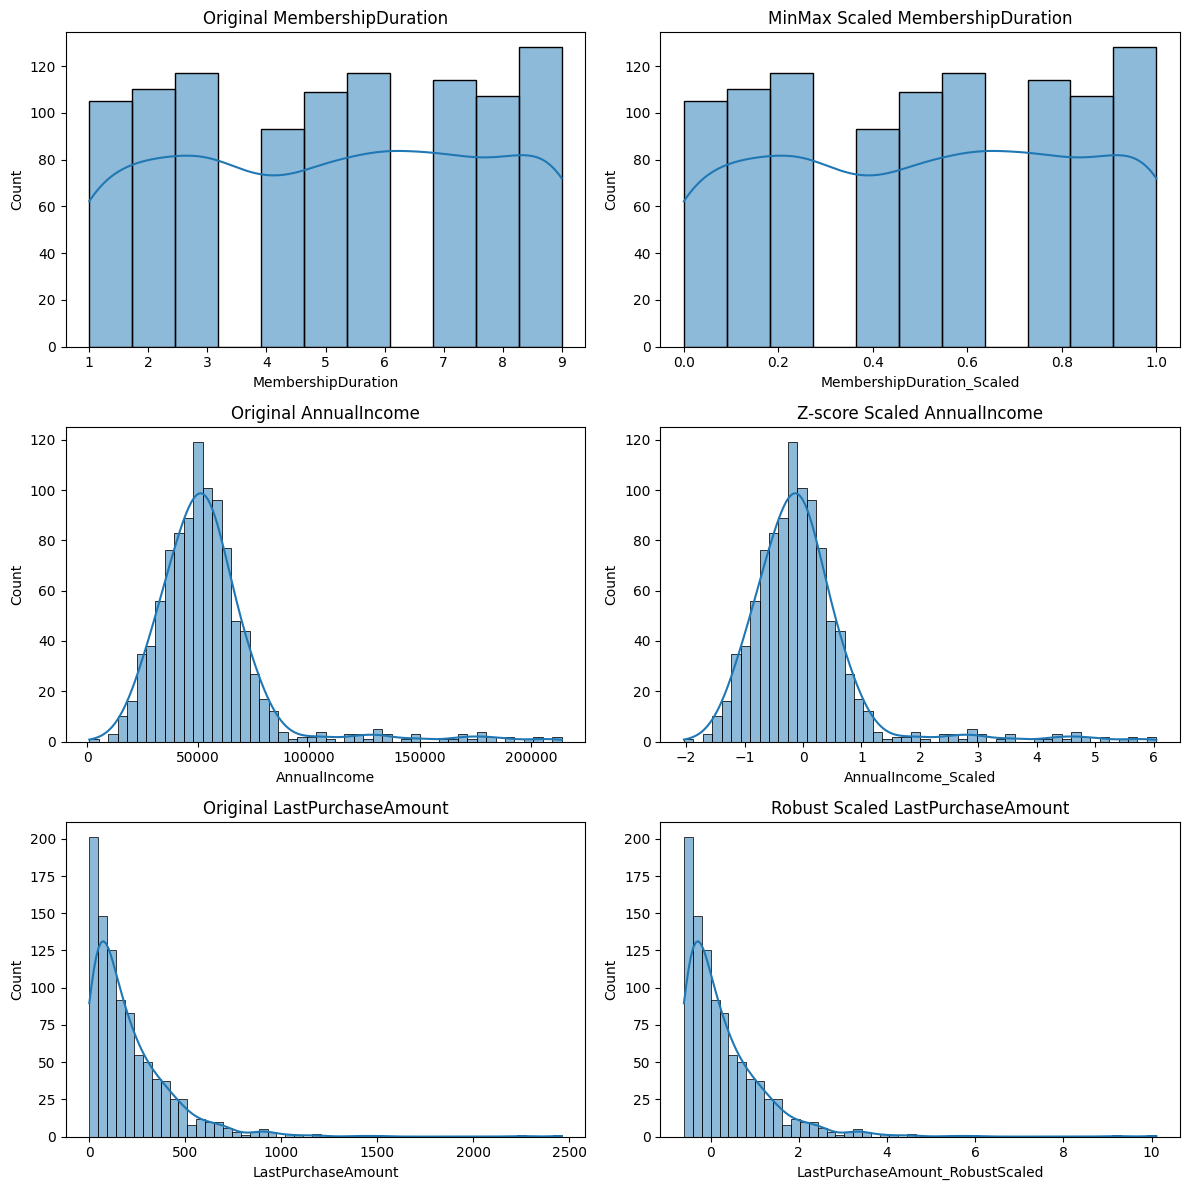

In [25]:
# Plotting before and after scaling for each feature
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Original and Scaled 'MembershipDuration'
sns.histplot(df['MembershipDuration'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Original MembershipDuration')
sns.histplot(df['MembershipDuration_Scaled'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('MinMax Scaled MembershipDuration')

# Original and Scaled 'AnnualIncome'
sns.histplot(df['AnnualIncome'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Original AnnualIncome')
sns.histplot(df['AnnualIncome_Scaled'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Z-score Scaled AnnualIncome')

# Original and Scaled 'LastPurchaseAmount'
sns.histplot(df['LastPurchaseAmount'], ax=axes[2, 0], kde=True)
axes[2, 0].set_title('Original LastPurchaseAmount')
sns.histplot(df['LastPurchaseAmount_RobustScaled'], ax=axes[2, 1], kde=True)
axes[2, 1].set_title('Robust Scaled LastPurchaseAmount')

plt.tight_layout()
plt.show()

##⌨️ **Exercise**

1. **Simple**: What is the range of values in the 'MembershipDuration' column after applying Min-Max scaling? (Code required)
2. **Moderate**: Compare the mean and standard deviation of 'AnnualIncome' before and after Z-score scaling. (Code required)
3. **Challenging (Optional🚀)**: For the 'LastPurchaseAmount' column, describe how Robust Scaling influences the presence of outliers. (Conceptual understanding)

<a name="section_4"></a>

# **4. Feature Engineering and One-hot Encoding**


[Return to contents](#contents)


In this tutorial, we will explore three different scaling techniques using the customer satisfaction survey dataset: Min-Max Scaling, Z-score Scaling, and Robust Scaling. These techniques are crucial in preprocessing data for many machine learning algorithms.

### **4.1 One-Hot Encoding**

One-Hot Encoding is used to convert categorical variables into a form that could be provided to machine learning algorithms to improve prediction accuracy. We will apply it to the PreferredProductCategory column.

Let's perform One-Hot Encoding PreferredProductCategory.

In [26]:
# Applying One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['PreferredProductCategory'])

# Displaying the new DataFrame
df_encoded.head()

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,ReturnedItemsLastYear,MembershipDuration_Scaled,AnnualIncome_Scaled,LastPurchaseAmount_RobustScaled,PreferredProductCategory_Clothing,PreferredProductCategory_Electronics,PreferredProductCategory_Groceries
0,1,62.0,46768.706676,30,1,106.411107,9,3,1.000,-0.300195,-0.144029,1,0,0
1,2,65.0,57211.417147,25,10,120.774766,4,5,0.375,0.096284,-0.081496,1,0,0
2,3,18.0,75577.800795,17,7,386.345119,6,3,0.625,0.793601,1.074685,0,1,0
3,4,21.0,31396.118017,17,6,188.322265,6,1,0.625,-0.883846,0.212577,1,0,0
4,5,21.0,47542.791123,15,7,275.150744,5,3,0.500,-0.270805,0.590592,0,0,1


### **4.2 Feature Engineering**

Feature engineering involves creating new features or modifying existing ones to improve the performance of machine learning models. We will create a new feature named SpendingScore.

**Creating SpendingScore Feature**

SpendingScore could be an interesting feature representing the spending efficiency of a customer. It can be calculated as the product of TotalPurchases and LastPurchaseAmount divided by AnnualIncome.

In [27]:
df['SpendingScore'] = (df['TotalPurchases'] * df['LastPurchaseAmount']) / df['AnnualIncome']
df.head()

,CustomerID,Age,AnnualIncome,TotalPurchases,SatisfactionRating,LastPurchaseAmount,MembershipDuration,PreferredProductCategory,ReturnedItemsLastYear,MembershipDuration_Scaled,AnnualIncome_Scaled,LastPurchaseAmount_RobustScaled,SpendingScore
0,1,62.0,46768.706676,30,1,106.411107,9,Clothing,3,1.000,-0.300195,-0.144029,0.068258
1,2,65.0,57211.417147,25,10,120.774766,4,Clothing,5,0.375,0.096284,-0.081496,0.052776
2,3,18.0,75577.800795,17,7,386.345119,6,Electronics,3,0.625,0.793601,1.074685,0.086902
3,4,21.0,31396.118017,17,6,188.322265,6,Clothing,1,0.625,-0.883846,0.212577,0.101971
4,5,21.0,47542.791123,15,7,275.150744,5,Groceries,3,0.500,-0.270805,0.590592,0.086812


In this tutorial, we created a new feature SpendingScore that represents the spending efficiency of customers.


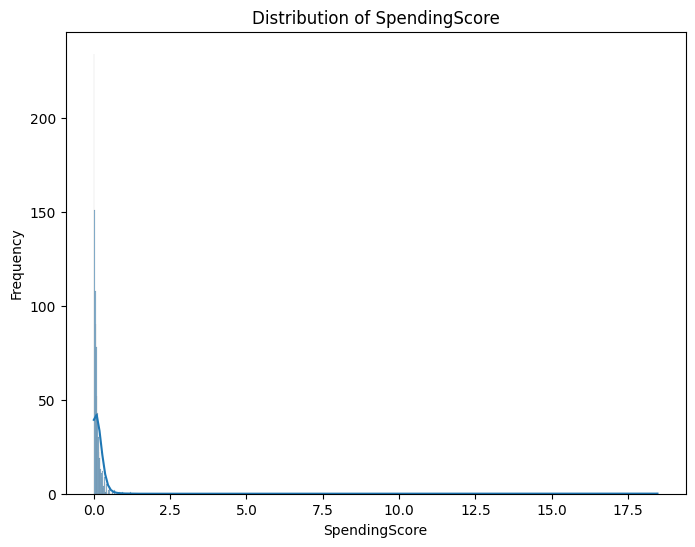

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the SpendingScore distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['SpendingScore'], kde=True)
plt.title('Distribution of SpendingScore')
plt.xlabel('SpendingScore')
plt.ylabel('Frequency')
plt.show()

##⌨️ **Exercise**

1. **Simple**: What is the formula used to calculate the 'SpendingScore' feature? (Conceptual understanding)
2. **Moderate**: Generate a new feature 'PurchaseFrequency' by dividing 'TotalPurchases' by 'MembershipDuration'. What does this feature represent? (Code required)
3. **Challenging (Optional🚀)**: Use one-hot encoding on the 'PreferredProductCategory' column and explain how it changes the dataset's structure. (Code required)